In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = np.asarray([1,2,3])
b = np.asarray([2,0,4])

In [6]:
# now find euclidian distance
l2 =  np.sum((b-a)**2)**0.5
l2

2.449489742783178

In [7]:
# manhattan distance 
l1 = np.sum(abs(b-a))
l1

4

In [8]:
#data preaparing ..........

In [10]:
mean1 = [1,0]
cov1=[[1,0.1],[0.1,2]]
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
mean2 = [4,5]
cov2 = [[1,0.1],[0.1,2]]
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

# print(dist1)
# print(dist2)

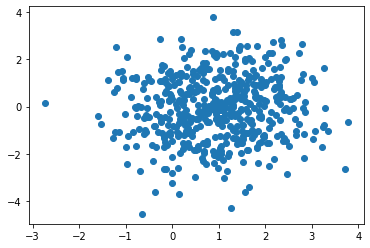

In [12]:
plt.scatter(dist1[:,0],dist1[:,1])

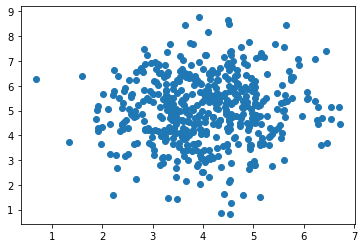

In [13]:
plt.scatter(dist2[:,0],dist2[:,1])

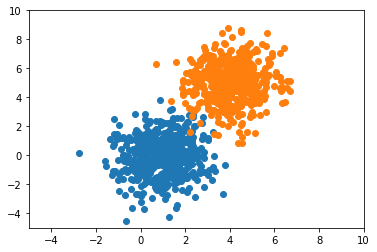

In [15]:
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
plt.show()

In [16]:
data = np.zeros((1000,3))

In [17]:
data[:500,:2] = dist1
data[500: , :2] = dist2
data[500: , -1] = 1

In [18]:
data.shape

(1000, 3)

In [19]:
data.mean(axis = 0)

array([2.48772266, 2.47982384, 0.5       ])

In [20]:
np.random.shuffle(data)

In [21]:
data[:10]

array([[ 3.94197739,  4.26253849,  1.        ],
       [ 0.73143458, -2.42018021,  0.        ],
       [ 1.0473246 , -0.11012175,  0.        ],
       [ 3.42659641,  4.31272287,  1.        ],
       [ 4.51261597,  5.9808517 ,  1.        ],
       [ 4.18905167,  4.75052328,  1.        ],
       [ 4.46190221,  5.29402654,  1.        ],
       [ 3.26467818,  5.61791469,  1.        ],
       [-0.12445575, -2.64655955,  0.        ],
       [ 4.9409766 ,  3.54746963,  1.        ]])

In [ ]:
# now we move on the direction of KNN algorithmmm...

In [22]:
def distance (a,b):
    return np.sum((a-b)**2)**0.5

In [27]:
def knn(x_train,y_train,test_point,k=7):
    
    distances=[]
    m=x_train.shape[0]
    for i in range(m):
        d = distance(x_train[i],test_point)
        distances.append([d,y_train[i]])
        
    sorted_labels = sorted(distances,key=lambda r:r[0])
    neighbors=np.asarray(sorted_labels)[:k,-1]
    #print(neighbors)
    
    freq = np.unique(neighbors, return_counts = True)
    index = freq[1].argmax()
    return freq[0][index]

In [28]:
# for testing the data set prdiested value by me 
x_train = data[:,:2]
y_train = data[:,-1]
test_point = np.array([4,0])
knn(x_train, y_train,test_point)

0.0

In [29]:
x_train  = data[ : ,:2]
y_train = data[:, -1]
test_point = np.asarray([5,4])
knn(x_train, y_train, test_point)

1.0

In [30]:
# now strat to finding the predected data  accurecy 

In [32]:
# split the dataset 
x_train =  data[:750,:2]
y_train = data[:750,-1]

x_test = data[750:,:2]
y_test = data[750:,-1]

print(x_test.shape, y_test.shape)
print(x_train.shape,  y_train.shape)

(250, 2) (250,)
(750, 2) (750,)


In [35]:


# make methodes for chacking accurecy 

def acc(k):
    predictions = []
    m = x_test.shape[0]
    for i in range(m):
        test_points = x_test[i]
        pred_label = knn(x_train, y_train,test_point, k)
        
        predictions.append(pred_label)
    preds = np.asarray(predictions)
#     print(preds==y_test)
    
    return (preds == y_test).sum()/m

In [37]:
acc(7) * 100

49.6

In [38]:
for k in range(1,10):
    print(f"for k = {k} acc = {acc(k)}")
    

for k = 1 acc = 0.496
for k = 2 acc = 0.496
for k = 3 acc = 0.496
for k = 4 acc = 0.496
for k = 5 acc = 0.496
for k = 6 acc = 0.496
for k = 7 acc = 0.496
for k = 8 acc = 0.496
for k = 9 acc = 0.496
